In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
import koreanize_matplotlib

In [32]:
df = pd.read_csv('../DATA/대구경북_사과생산량.csv', encoding='cp949',index_col=0)
dp = df.T
dp['대구경북']=dp['대구광역시']+dp['경상북도']
dp['대구경북']

1994    406225
1995    491306
1996    440865
1997    443900
1998    303866
1999    311934
2000    317198
2001    243439
2002    276138
2003    231874
2004    219948
2005    220683
2006    255129
2007    272681
2008    278862
2009    306478
2010    293875
2011    241918
2012    252856
2013    310314
2014    293602
2015    374175
2016    369337
2017    339356
2018    315739
2019    338463
2020    278589
2021    309786
2022    331522
2023    245631
Name: 대구경북, dtype: int64

In [44]:
df1 = pd.read_csv('../DATA/대구경북_면적당사과.csv', encoding='cp949',index_col=0)
dp1 = df1.T
dp1['대구경북']=dp1['대구광역시']+dp1['경상북도']
dp1

시도별,대구광역시,경상북도,대구경북
1994,904,1120,2024
1995,805,1421,2226
1996,1536,1514,3050
1997,1971,1688,3659
1998,1756,1358,3114
1999,1982,1541,3523
2000,1971,1682,3653
2001,1330,1439,2769
2002,1794,1650,3444
2003,1341,1376,2717


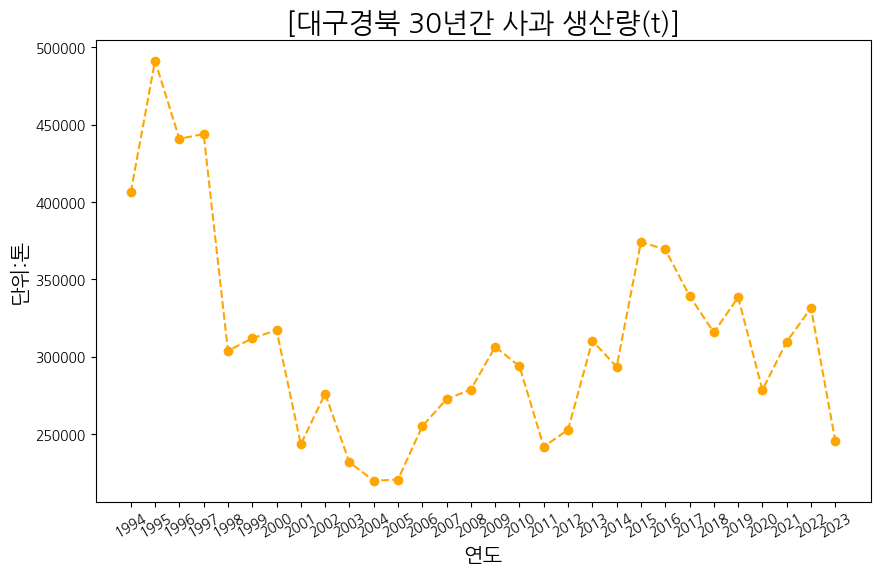

In [268]:
plt.figure(figsize=(10,6))
plt.plot(dp['대구경북'],color='orange',marker='o',linestyle='--')
plt.xticks(rotation=30)
plt.xlabel('연도',fontsize=15)
plt.ylabel('단위:톤',fontsize=15)
plt.title('[대구경북 30년간 사과 생산량(t)]',fontsize=20)
plt.show()

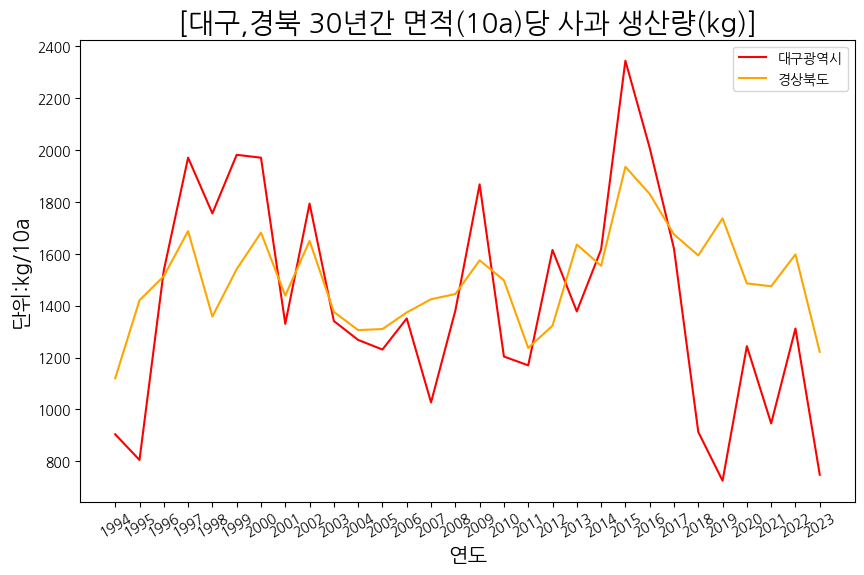

In [115]:
plt.figure(figsize=(10,6))
plt.plot(dp1['대구광역시'],color='red',linestyle='-',label='대구광역시')
plt.plot(dp1['경상북도'],color='orange',linestyle='-',label='경상북도')
plt.xticks(rotation=30)
plt.legend()
plt.xlabel('연도',fontsize=15)
plt.ylabel('단위:kg/10a',fontsize=15)
plt.title('[대구,경북 30년간 면적(10a)당 사과 생산량(kg)]',fontsize=20)
plt.show()

In [83]:
temper = pd.read_csv('../DATA/월별_경북기온.csv', encoding='cp949')
temper.columns=['년월', '지점', '평균기온', '평균최저기온', '평균최고기온']

In [269]:
temper['년월']=temper['년월'].str.strip()
temper.dropna(inplace=True)
temper['기온차']=temper['평균최고기온']-temper['평균최저기온']
temper

,년월,지점,평균기온,평균최저기온,평균최고기온,기온차
0,1994-01,경북,-0.5,-5.5,5.5,11.0
1,1994-02,경북,1.5,-3.8,7.6,11.4
2,1994-03,경북,4.6,-0.7,10.5,11.2
3,1994-04,경북,13.8,6.7,20.8,14.1
4,1994-05,경북,17.6,11.3,23.9,12.6
...,...,...,...,...,...,...
355,2023-08,경북,26.2,22.7,30.7,8.0
356,2023-09,경북,22.2,18.7,26.7,8.0
357,2023-10,경북,14.3,8.8,21.1,12.3
358,2023-11,경북,7.9,2.5,13.9,11.4


In [142]:
years=temper['년월'].str.slice(0,4).unique()
years

array(['1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [85]:
months=temper['년월'].str.slice(5,7).unique()
months


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [270]:
month_temp_list = []
month_temp_dict={}
for a in months:
    month_temp_dict[a]=temper[temper['년월'].str.slice(5,7) == a]
    month_temp_list.append(temper[temper['년월'].str.slice(5,7) == a])
month_temp_list[0]

,년월,지점,평균기온,평균최저기온,평균최고기온,기온차
0,1994-01,경북,-0.5,-5.5,5.5,11.0
12,1995-01,경북,-1.0,-6.0,4.7,10.7
24,1996-01,경북,-0.8,-5.8,5.0,10.8
36,1997-01,경북,-1.1,-6.3,4.8,11.1
48,1998-01,경북,0.1,-4.5,5.2,9.7
60,1999-01,경북,0.5,-4.6,6.4,11.0
72,2000-01,경북,0.3,-4.2,5.1,9.3
84,2001-01,경북,-1.5,-5.8,3.1,8.9
96,2002-01,경북,1.2,-3.0,5.9,8.9
108,2003-01,경북,-1.5,-6.3,3.8,10.1


In [183]:

def month_temp_plot(month_temp_dict, month):
    color_list = [["평균최고기온",'r'], ["평균기온",'g'], ["평균최저기온",'b']]
    fig, ax1 = plt.subplots(figsize=(10,6))
    for l in color_list:
        ax1.plot(month_temp_dict[month]['년월'].str.slice(0,4),month_temp_dict[month][l[0]], color=l[1], label=l[0])
    plt.xticks(rotation=45)
    ax1.set_ylabel('온도:섭씨')
    plt.title(f'{month}월 30년간 기온')
    plt.legend(loc='upper left')
    
    ax2=ax1.twinx()
    ax2.plot(dp['대구경북'], color='orange', marker='o',linestyle='--',label='사과생산량')
    ax2.legend(loc='upper right')
    ax2.set_ylabel('톤(t)')
    ax2.set_ylim(200000,550000)
    plt.show()


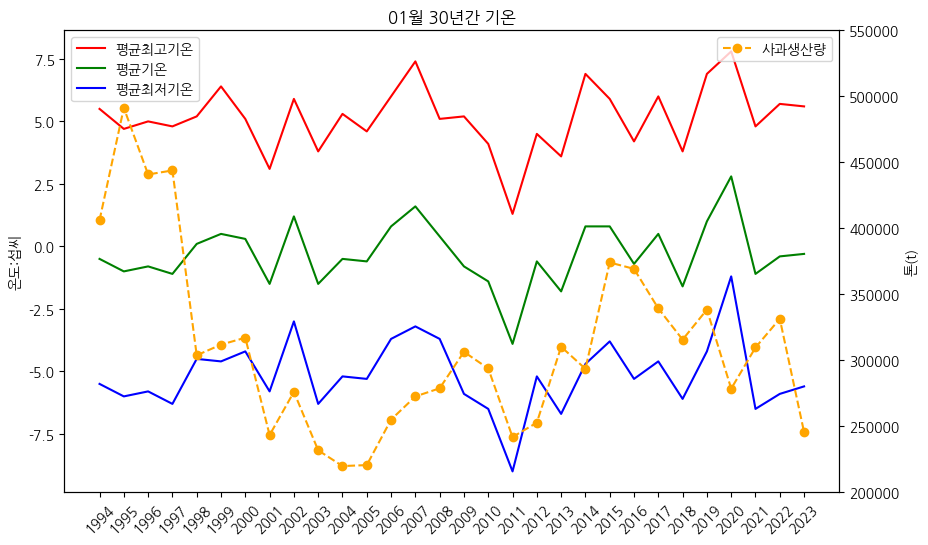

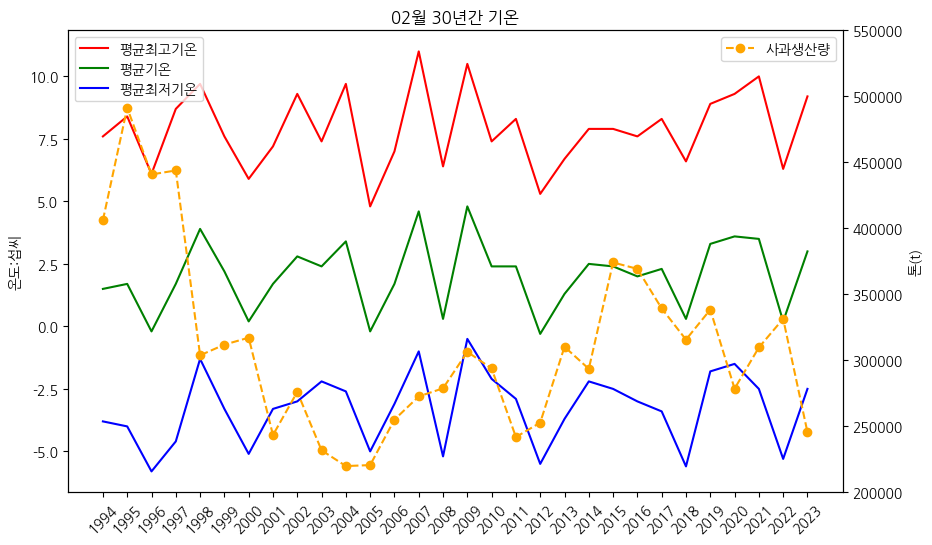

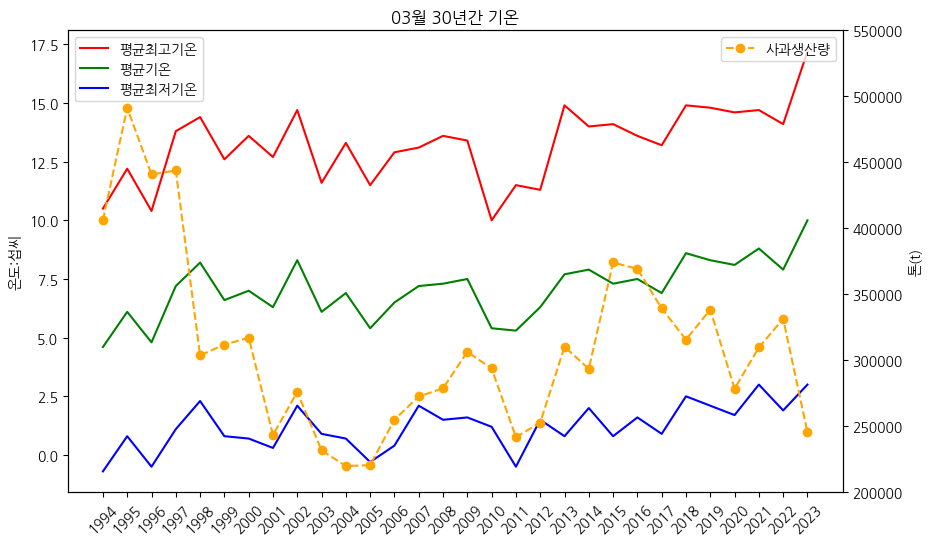

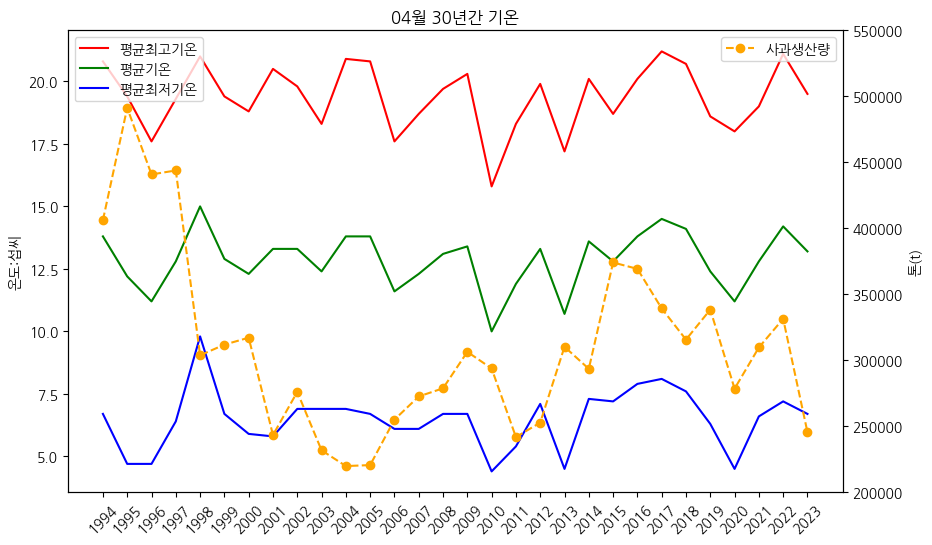

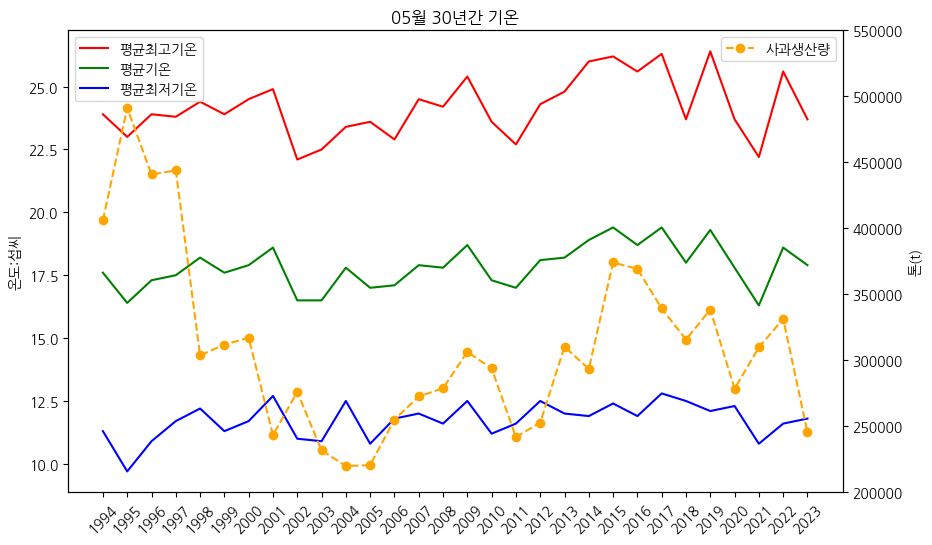

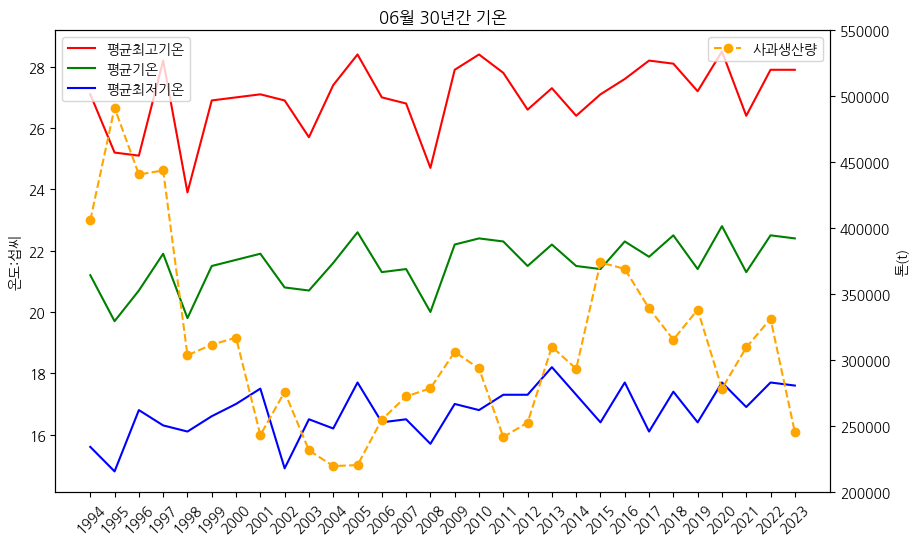

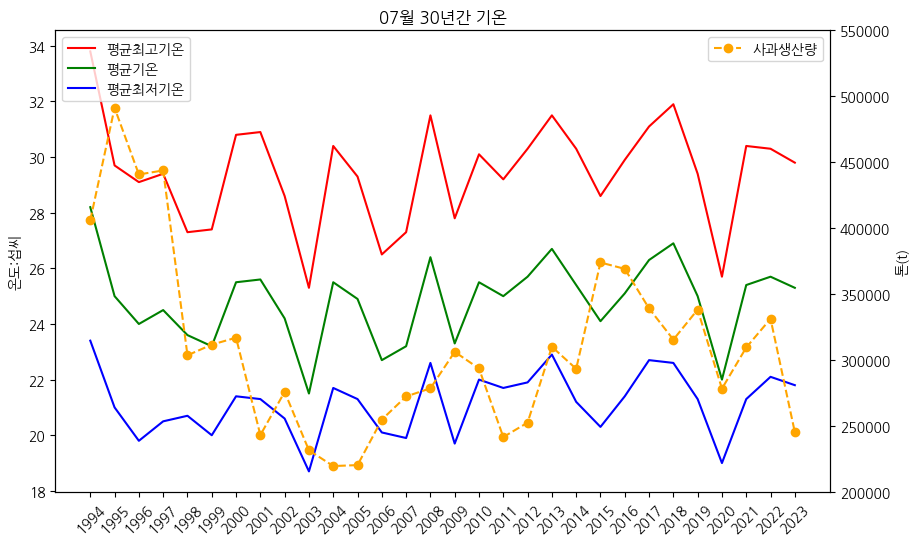

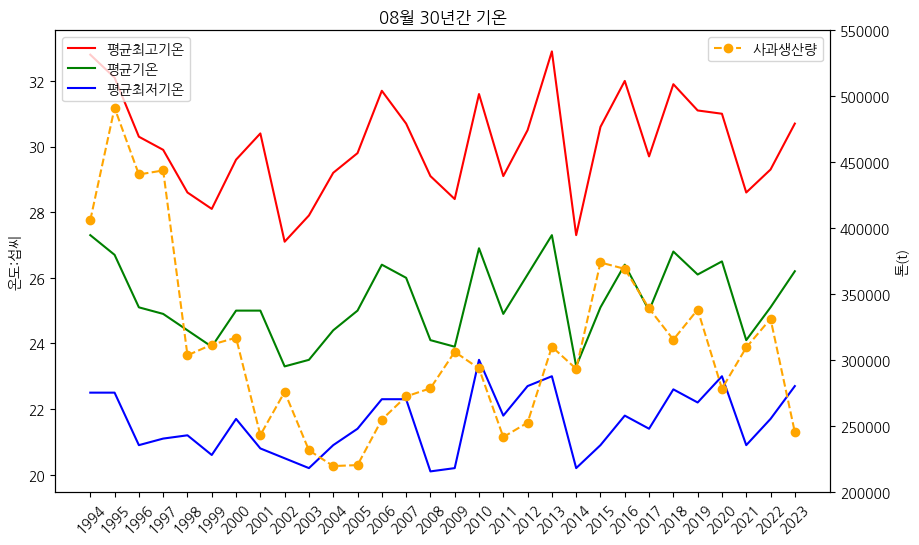

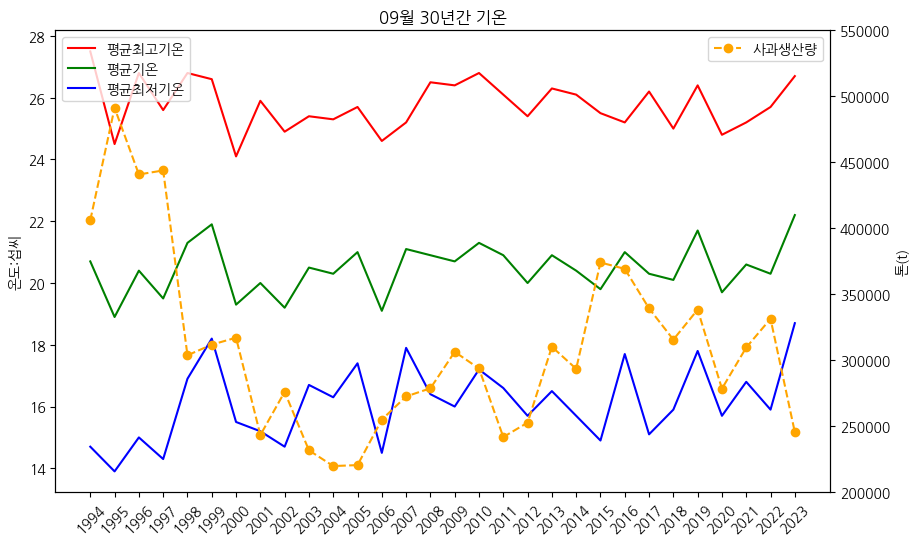

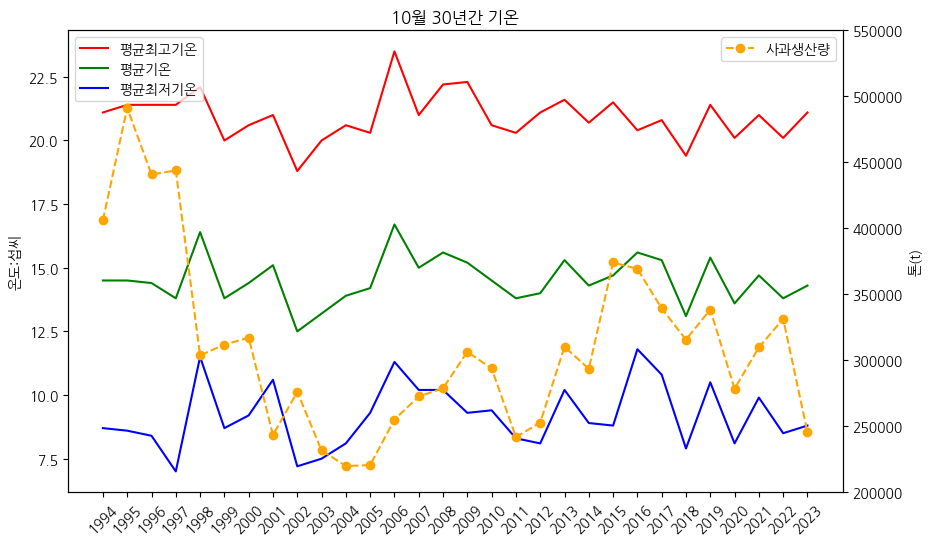

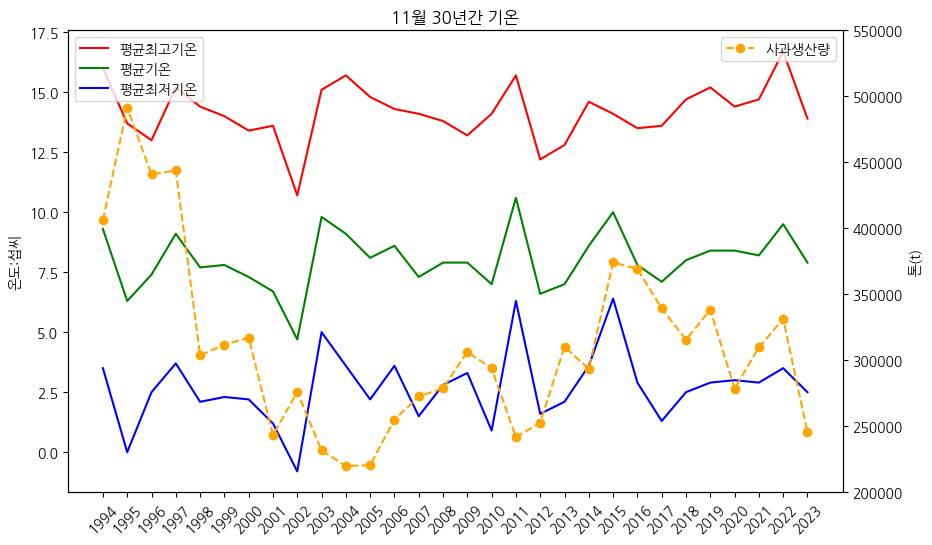

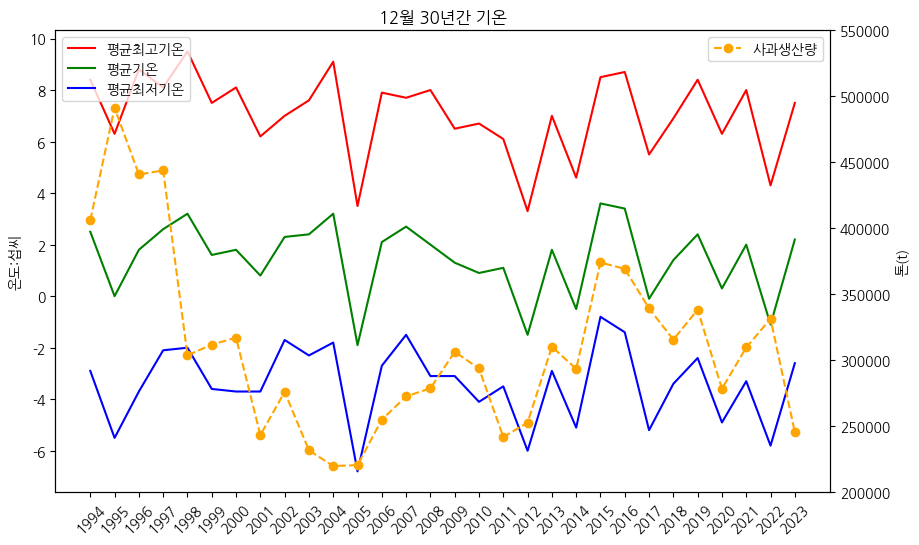

In [184]:
for a in months:
    month_temp_plot(month_temp_dict, a)

In [278]:
def month_tempdiff_plot(month_temp_dict, month):
    color_list = [["평균최고기온",'r'], ["평균기온",'g'], ["평균최저기온",'b']]
    fig, ax1 = plt.subplots(figsize=(10,6))
    
    ax1.plot(month_temp_dict[month]['년월'].str.slice(0,4),month_temp_dict[month]['기온차'], color='violet', label='기온차')
    plt.xticks(rotation=45)
    ax1.set_ylabel('온도:섭씨')
    
    plt.title(f'{month}월 30년간 기온')
    plt.legend(loc='upper left')
    
    ax2=ax1.twinx()
    ax2.plot(dp['대구경북'], color='orange', marker='o',linestyle='--',label='사과생산량')
    ax2.legend(loc='upper right')
    ax2.set_ylabel('톤(t)')
    ax2.set_ylim(200000,550000)
    plt.show()

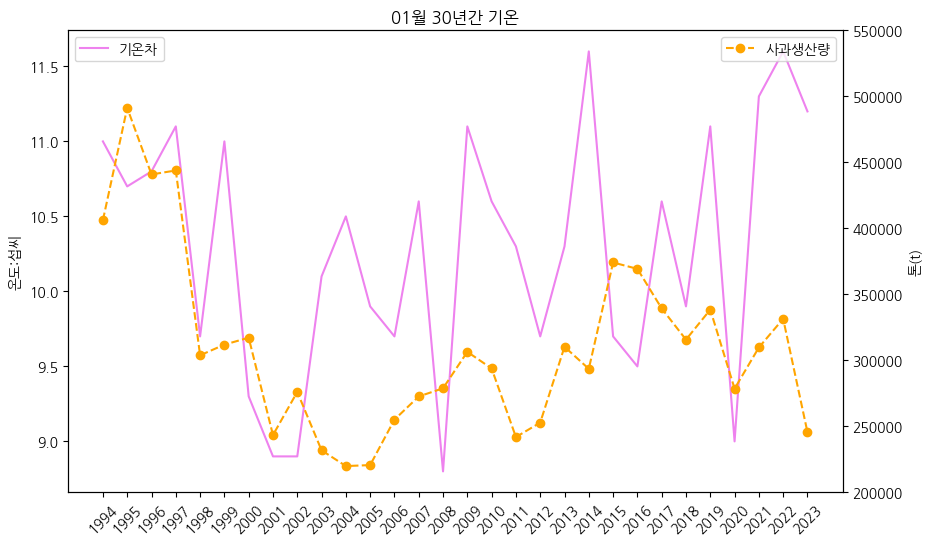

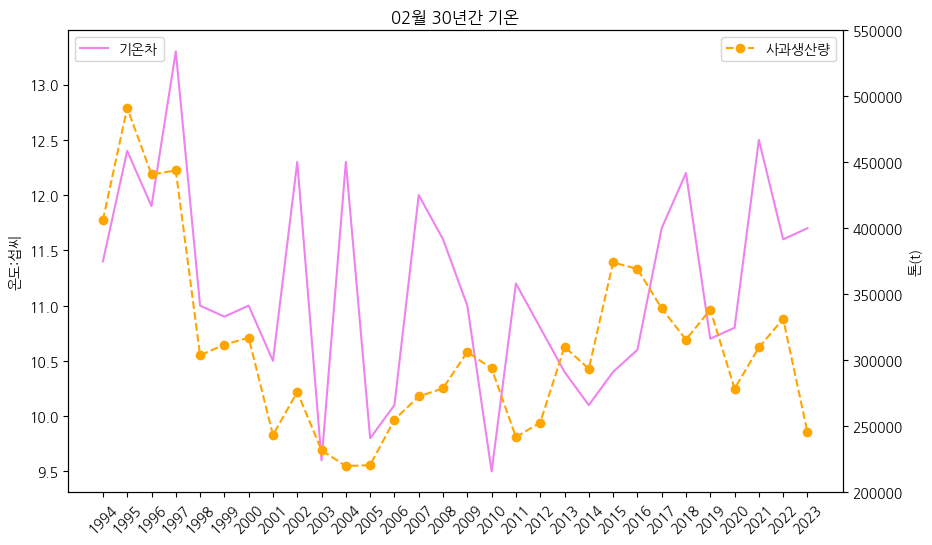

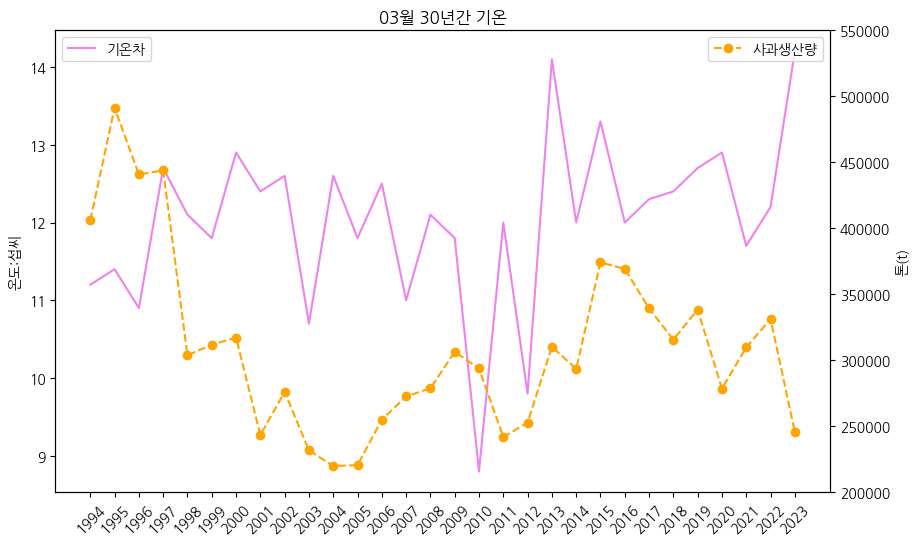

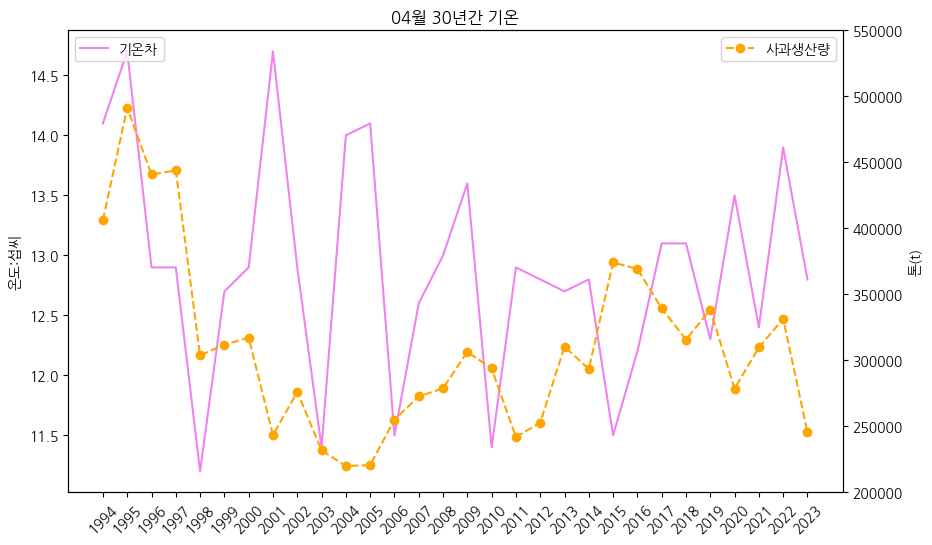

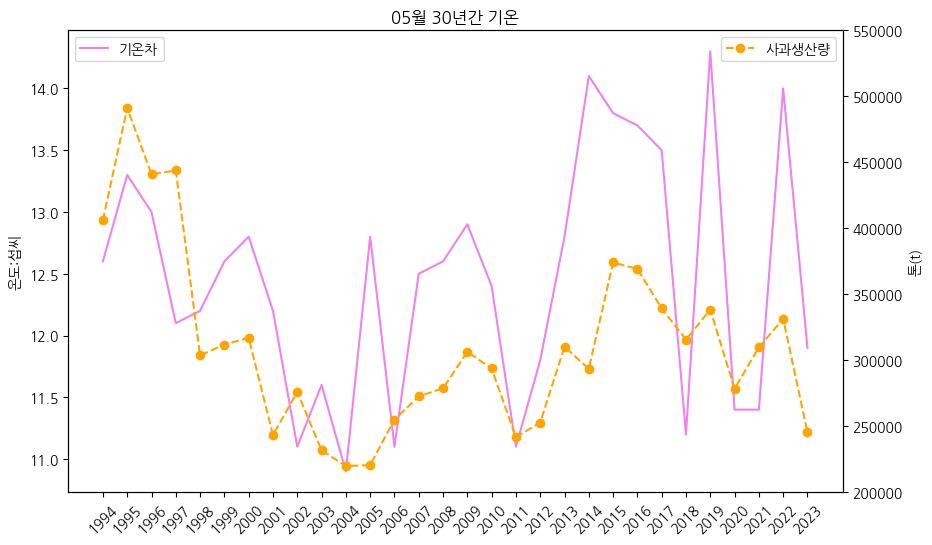

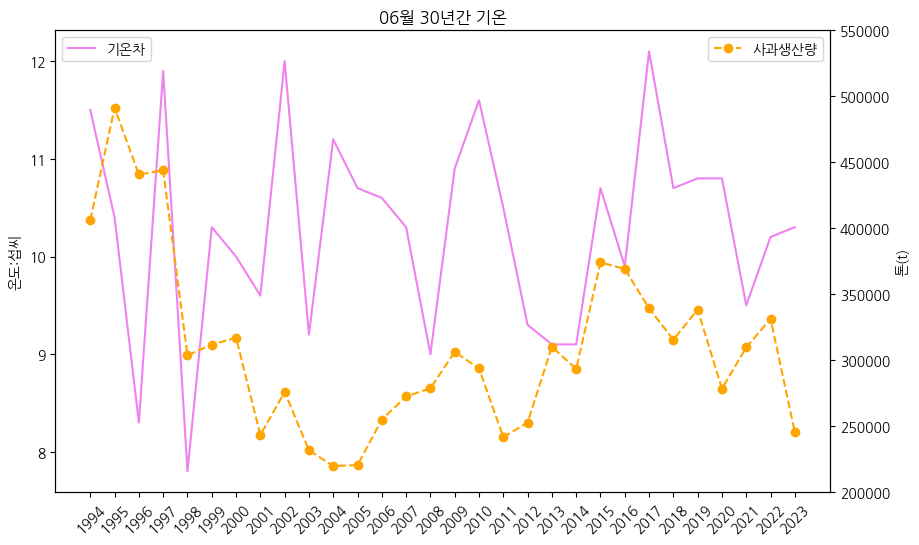

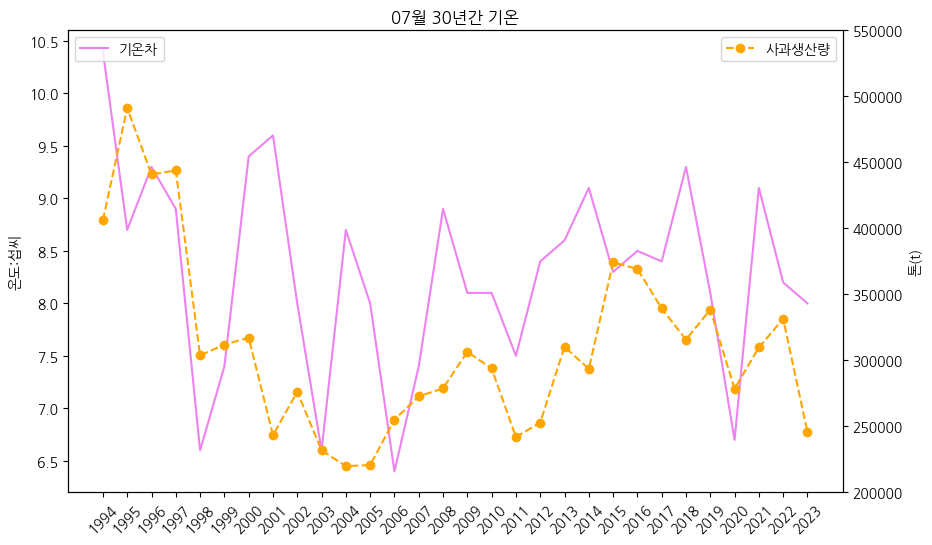

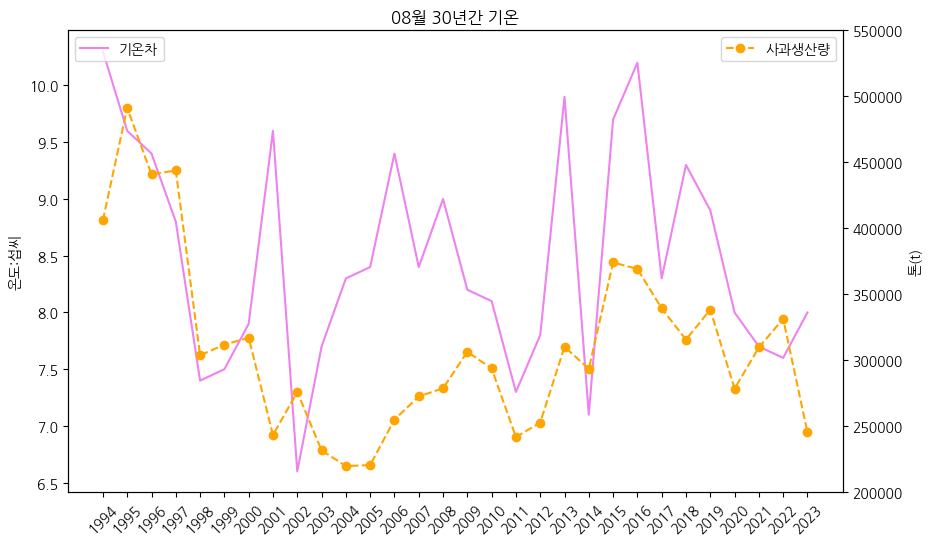

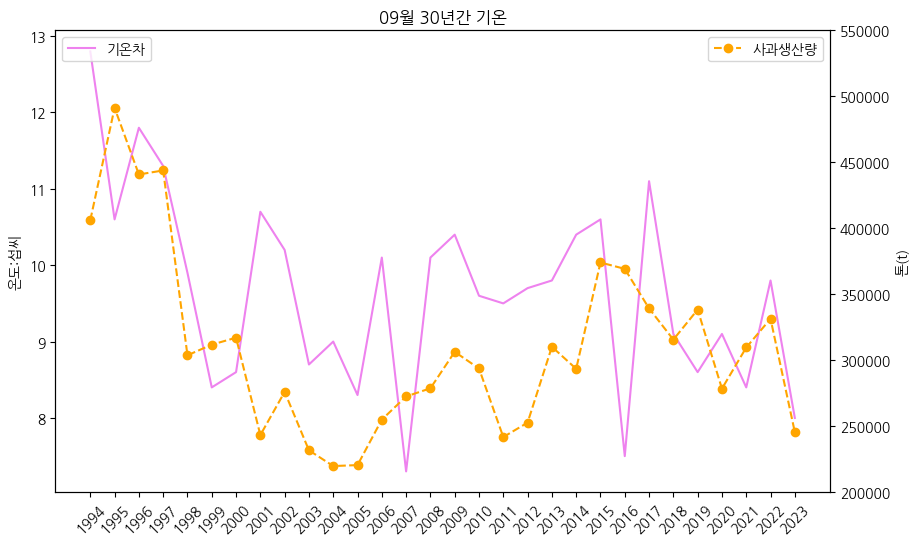

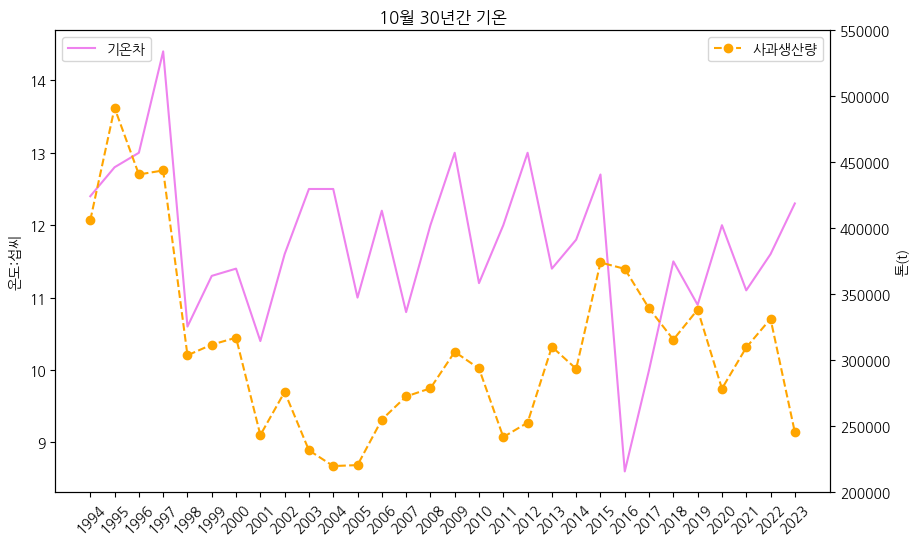

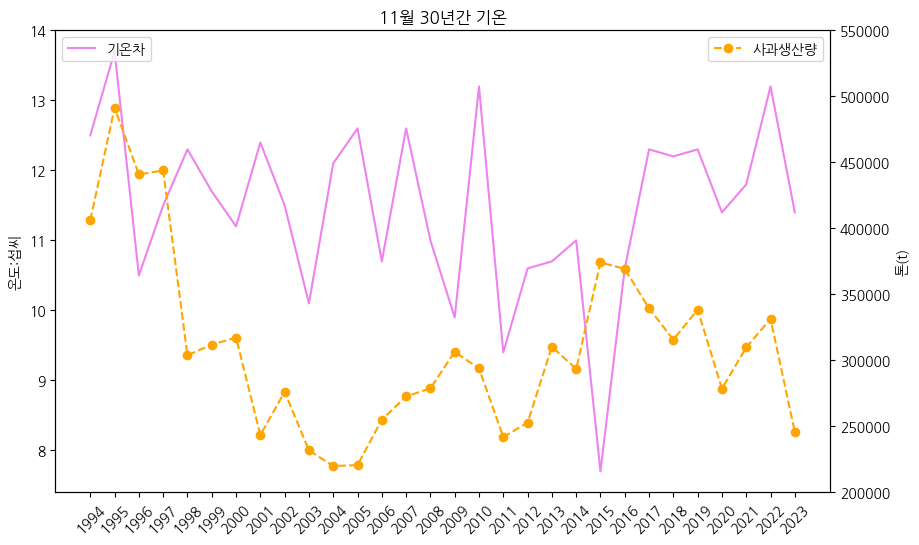

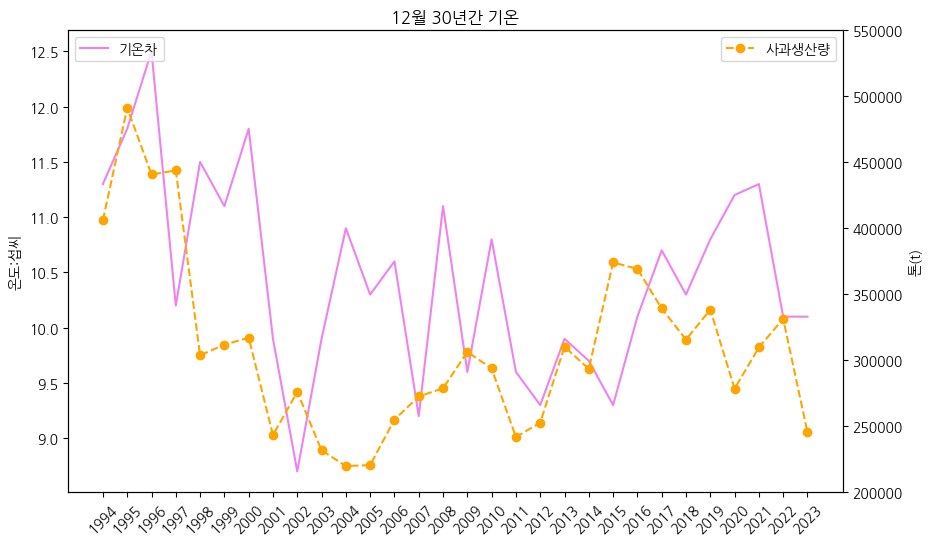

In [280]:
for a in months:
    month_tempdiff_plot(month_temp_dict,a)

In [281]:
m = 1
for a in month_temp_list:
    
    apple_Corr=np.corrcoef(a['기온차'],dp1['대구경북'])[0][1]
    print(f'{m}월의 기온차와 사과생산량 상관계수 : {apple_Corr}')
    m += 1

1월의 기온차와 사과생산량 상관계수 : -0.23071094541807452
2월의 기온차와 사과생산량 상관계수 : -0.10444800613314316
3월의 기온차와 사과생산량 상관계수 : 0.1630160591091585
4월의 기온차와 사과생산량 상관계수 : -0.3102752735239181
5월의 기온차와 사과생산량 상관계수 : 0.33108841822758606
6월의 기온차와 사과생산량 상관계수 : 0.008711598778701271
7월의 기온차와 사과생산량 상관계수 : -0.018517055474796304
8월의 기온차와 사과생산량 상관계수 : -0.02995665473239868
9월의 기온차와 사과생산량 상관계수 : 0.10538780968884036
10월의 기온차와 사과생산량 상관계수 : -0.055620762580820264
11월의 기온차와 사과생산량 상관계수 : -0.5039026101508962
12월의 기온차와 사과생산량 상관계수 : -0.19956000895969242


In [120]:
m = 1
for a in month_temp_list:
    
    apple_Corr=np.corrcoef(a['평균기온'],dp1['대구경북'])[0][1]
    print(f'{m}월의 평균기온과 사과생산량 상관계수 : {apple_Corr}')
    m += 1

1월의 평균기온과 사과생산량 상관계수 : 0.21631178548685814
2월의 평균기온과 사과생산량 상관계수 : -0.04321314106291337
3월의 평균기온과 사과생산량 상관계수 : 0.08054038263634541
4월의 평균기온과 사과생산량 상관계수 : 0.10644558999078332
5월의 평균기온과 사과생산량 상관계수 : 0.40133292414971977
6월의 평균기온과 사과생산량 상관계수 : 0.01625547455652062
7월의 평균기온과 사과생산량 상관계수 : -0.22409269128434223
8월의 평균기온과 사과생산량 상관계수 : -0.366462553681224
9월의 평균기온과 사과생산량 상관계수 : -0.24623167303525423
10월의 평균기온과 사과생산량 상관계수 : 0.05294301537164519
11월의 평균기온과 사과생산량 상관계수 : -0.06456552508350319
12월의 평균기온과 사과생산량 상관계수 : 0.20110805374084034


In [131]:
m = 1
for a in month_temp_list:
    
    apple_Corr=np.corrcoef(a['평균최고기온'],dp1['대구경북'])[0][1]
    print(f'{m}월의 평균최고기온과 사과생산량 상관계수 : {apple_Corr}')
    m += 1

1월의 평균최고기온과 사과생산량 상관계수 : 0.11050142841763258
2월의 평균최고기온과 사과생산량 상관계수 : -0.08729354139799961
3월의 평균최고기온과 사과생산량 상관계수 : 0.10071233829476396
4월의 평균최고기온과 사과생산량 상관계수 : 0.02454207871618967
5월의 평균최고기온과 사과생산량 상관계수 : 0.42716455690111454
6월의 평균최고기온과 사과생산량 상관계수 : 0.01902544975460647
7월의 평균최고기온과 사과생산량 상관계수 : -0.17364796544255587
8월의 평균최고기온과 사과생산량 상관계수 : -0.28510897301102683
9월의 평균최고기온과 사과생산량 상관계수 : -0.15550543312646278
10월의 평균최고기온과 사과생산량 상관계수 : -0.009487479755588274
11월의 평균최고기온과 사과생산량 상관계수 : -0.37043985770823307
12월의 평균최고기온과 사과생산량 상관계수 : 0.12304214995077739


In [132]:
m = 1
for a in month_temp_list:
    
    apple_Corr=np.corrcoef(a['평균최저기온'],dp1['대구경북'])[0][1]
    print(f'{m}월의 평균최저기온과 사과생산량 상관계수 : {apple_Corr}')
    m += 1

1월의 평균최저기온과 사과생산량 상관계수 : 0.23456904188633962
2월의 평균최저기온과 사과생산량 상관계수 : -0.02468225453903093
3월의 평균최저기온과 사과생산량 상관계수 : -0.01845649076712628
4월의 평균최저기온과 사과생산량 상관계수 : 0.27135740708446776
5월의 평균최저기온과 사과생산량 상관계수 : 0.2700930356613889
6월의 평균최저기온과 사과생산량 상관계수 : 0.015247941204143274
7월의 평균최저기온과 사과생산량 상관계수 : -0.2685640242465919
8월의 평균최저기온과 사과생산량 상관계수 : -0.4281875857317988
9월의 평균최저기온과 사과생산량 상관계수 : -0.20953346928417516
10월의 평균최저기온과 사과생산량 상관계수 : 0.0417284984598008
11월의 평균최저기온과 사과생산량 상관계수 : 0.12481896421614276
12월의 평균최저기온과 사과생산량 상관계수 : 0.249134757609118


In [140]:

df2 = pd.read_excel('../DATA/경북 기온 데이터 19940101-20231231.xlsx')
df2[df2['날짜'].dt.strftime('%m') == '01']

,날짜,평균기온,최저기온,최고기온
0,1994-01-01,-0.9,-5.8,4.8
1,1994-01-02,1.8,-4.3,8.9
2,1994-01-03,5.0,0.2,11.0
3,1994-01-04,1.2,-3.0,5.8
4,1994-01-05,1.3,-2.6,7.1
...,...,...,...,...
10618,2023-01-27,-4.6,-8.7,-0.3
10619,2023-01-28,-4.8,-10.6,0.6
10620,2023-01-29,-0.8,-7.7,4.6
10621,2023-01-30,-0.4,-5.1,4.8


In [147]:
y_months=df2['날짜'].dt.strftime('%Y-%m').unique()
y_months

array(['1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12',
       '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06',
       '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12',
       '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06',
       '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12',
       '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06',
       '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12',
       '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
       '2000-07', '2000-08', '2000-09', '2000-10', 

In [164]:
DP = pd.DataFrame(columns=['날짜','최저기온','최고기온'])
DP

,날짜,최저기온,최고기온


In [165]:
for ym in y_months:
    DP2=df2[df2['날짜'].dt.strftime('%Y-%m') == ym]   # 해당하는 년월의 일일 기온들
    DP2['최고기온'].max()
    DP.loc[ym] = [ym,DP2['최저기온'].min(),DP2['최고기온'].max()]
DP

,날짜,최저기온,최고기온
1994-01,1994-01,-12.0,11.4
1994-02,1994-02,-9.7,14.0
1994-03,1994-03,-4.9,19.2
1994-04,1994-04,-0.3,26.1
1994-05,1994-05,5.0,30.0
...,...,...,...
2023-08,2023-08,20.0,35.3
2023-09,2023-09,14.2,30.1
2023-10,2023-10,3.4,23.7
2023-11,2023-11,-4.8,26.5


,최저기온,최고기온
1994-01,-12.0,11.4
1994-02,-9.7,14.0
1994-03,-4.9,19.2
1994-04,-0.3,26.1
1994-05,5.0,30.0
...,...,...
2023-08,20.0,35.3
2023-09,14.2,30.1
2023-10,3.4,23.7
2023-11,-4.8,26.5


In [170]:
DP[DP['날짜'].str.slice(5,7) == '01']

,날짜,최저기온,최고기온
1994-01,1994-01,-12.0,11.4
1995-01,1995-01,-11.2,11.7
1996-01,1996-01,-11.1,9.6
1997-01,1997-01,-12.6,11.0
1998-01,1998-01,-11.6,11.4
1999-01,1999-01,-10.5,12.4
2000-01,2000-01,-10.4,10.5
2001-01,2001-01,-14.5,8.5
2002-01,2002-01,-10.9,13.4
2003-01,2003-01,-13.3,11.3


In [214]:
# 특이점 기온 생성을 위한 일 기온 딕셔너리
event_temp_dict={}
event_temp_list=[]
for m in months:
    event_temp_list.append(DP[DP['날짜'].str.slice(5,7) == m])
    event_temp_dict[m] = DP[DP['날짜'].str.slice(5,7) == m]

In [210]:

def event_temp_plot(event_temp_dict, month):
    color_list = [["최고기온",'r'], ["최저기온",'b']]
    fig, ax1 = plt.subplots(figsize=(10,6))
    
    ax1.bar(event_temp_dict[month]['날짜'].str.slice(0,4),dp['대구경북'], color='orange', linestyle='-',label='사과생산량')
    ax1.legend(loc='upper left')
    ax1.set_ylabel('톤(t)')
    plt.xticks(rotation=45)
    ax1.set_ylim(200000,550000)
    
    
    
    ax2=ax1.twinx()
    
    for l in color_list:
        ax2.plot(event_temp_dict[month]['날짜'].str.slice(0,4),event_temp_dict[month][l[0]], color=l[1], label=l[0])
    ax2.set_ylabel('온도:섭씨')
    
    plt.legend(loc='upper right')
   
    plt.title(f'{month}월 - 30년간 특이점 기온')
    
    plt.show()


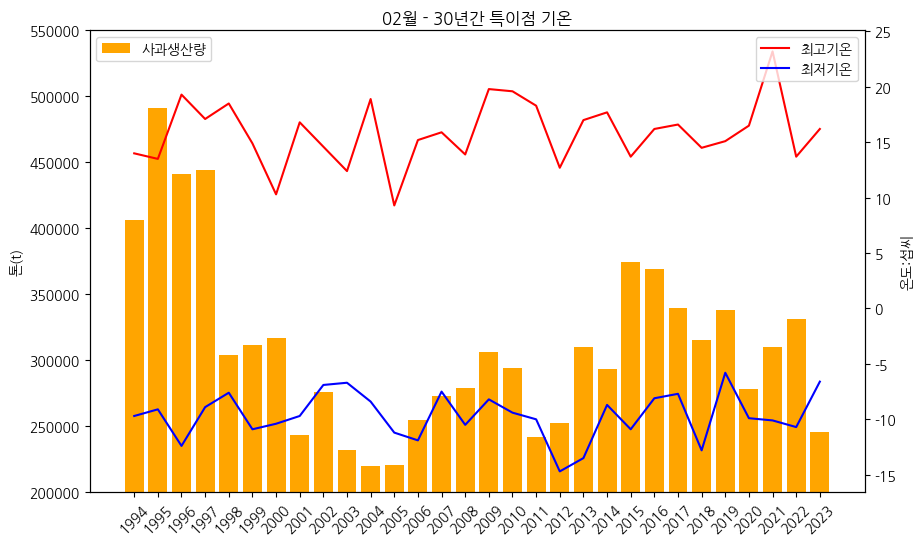

In [211]:
event_temp_plot(event_temp_dict,'02')

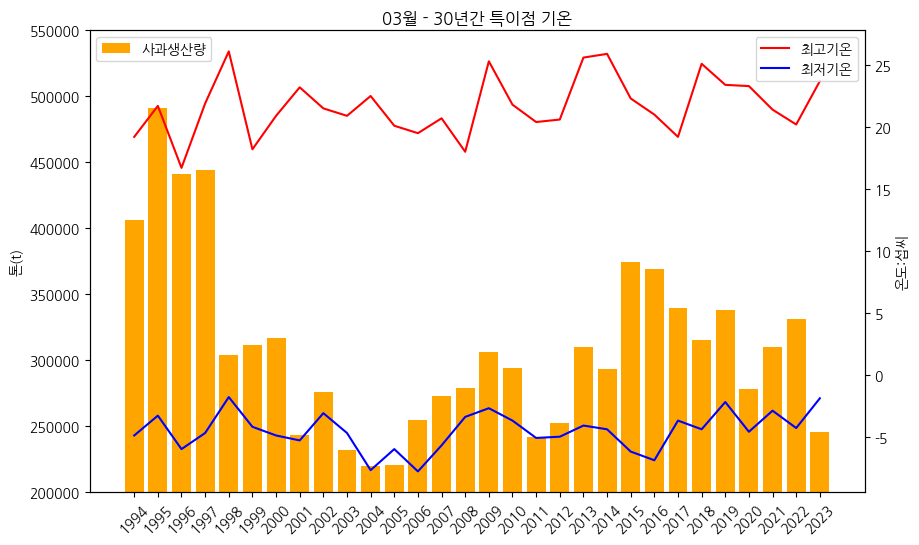

In [212]:
event_temp_plot(event_temp_dict,'03')

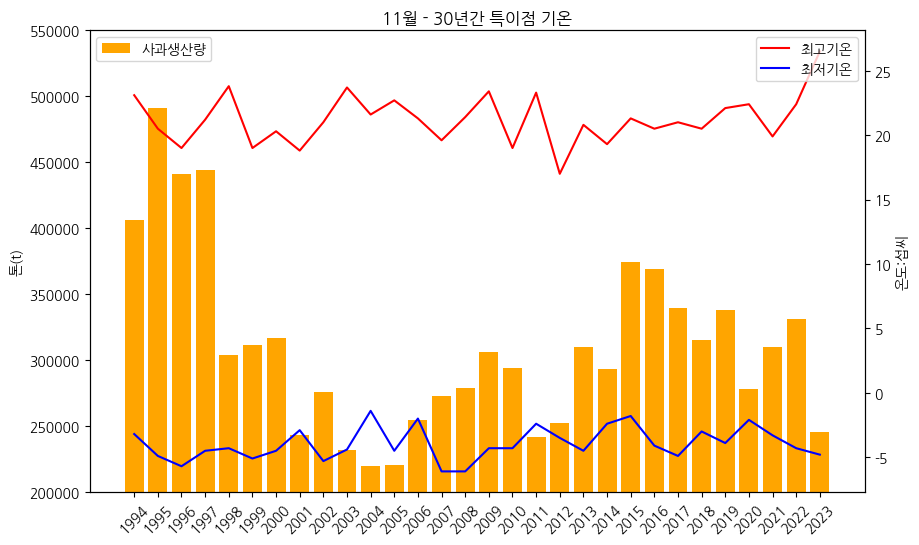

In [282]:
event_temp_plot(event_temp_dict,'11')

In [217]:
m = 1
for a in event_temp_list:
    apple_Corr=np.corrcoef(a['최저기온'],dp1['대구경북'])[0][1]
    print(f'{m}월의 최저기온과 사과생산량 상관계수 : {apple_Corr}')
    m += 1

1월의 최저기온과 사과생산량 상관계수 : 0.1838579969146081
2월의 최저기온과 사과생산량 상관계수 : -0.07299899792809227
3월의 최저기온과 사과생산량 상관계수 : -0.17068017795391652
4월의 최저기온과 사과생산량 상관계수 : 0.4249256994490545
5월의 최저기온과 사과생산량 상관계수 : 0.3798906959959677
6월의 최저기온과 사과생산량 상관계수 : -0.15742575575170548
7월의 최저기온과 사과생산량 상관계수 : -0.322144182864601
8월의 최저기온과 사과생산량 상관계수 : -0.20498700784996826
9월의 최저기온과 사과생산량 상관계수 : 0.001617933145523466
10월의 최저기온과 사과생산량 상관계수 : -0.3129457484756553
11월의 최저기온과 사과생산량 상관계수 : -0.04164565737099324
12월의 최저기온과 사과생산량 상관계수 : 0.35797709672225503


In [218]:
m = 1
for a in event_temp_list:
    apple_Corr=np.corrcoef(a['최고기온'],dp1['대구경북'])[0][1]
    print(f'{m}월의 최고기온과 사과생산량 상관계수 : {apple_Corr}')
    m += 1

1월의 최고기온과 사과생산량 상관계수 : -0.0668983842006816
2월의 최고기온과 사과생산량 상관계수 : -0.06154168765953884
3월의 최고기온과 사과생산량 상관계수 : 0.006185722512071176
4월의 최고기온과 사과생산량 상관계수 : 0.1207481439300001
5월의 최고기온과 사과생산량 상관계수 : 0.23519291274445922
6월의 최고기온과 사과생산량 상관계수 : 0.11580094115422526
7월의 최고기온과 사과생산량 상관계수 : -0.04468172748525227
8월의 최고기온과 사과생산량 상관계수 : -0.17238359738727504
9월의 최고기온과 사과생산량 상관계수 : -0.03027331120506427
10월의 최고기온과 사과생산량 상관계수 : 0.09927977933498602
11월의 최고기온과 사과생산량 상관계수 : -0.2796827744725062
12월의 최고기온과 사과생산량 상관계수 : -0.09009039144367792


In [231]:
rain_df = pd.read_csv('../DATA/경북연도별강수량.csv',encoding='cp949')
rain_df


,년,강수량
0,1994,706.9
1,1995,812.3
2,1996,947.9
3,1997,1135.4
4,1998,1603.7
5,1999,1454.6
6,2000,1103.1
7,2001,875.5
8,2002,1359.9
9,2003,1847.9


In [220]:

def total_rain_plot(event_temp_dict, month):
    color_list = [["최고기온",'r'], ["최저기온",'b']]
    fig, ax1 = plt.subplots(figsize=(10,6))
    
    ax1.bar(event_temp_dict[month]['날짜'].str.slice(0,4),dp['대구경북'], color='orange', linestyle='-',label='사과생산량')
    ax1.legend(loc='upper left')
    ax1.set_ylabel('톤(t)')
    plt.xticks(rotation=45)
    ax1.set_ylim(200000,550000)
    
    
    
    ax2=ax1.twinx()
    
    for l in color_list:
        ax2.plot(event_temp_dict[month]['날짜'].str.slice(0,4),event_temp_dict[month][l[0]], color=l[1], label=l[0])
    ax2.set_ylabel('온도:섭씨')
    
    plt.legend(loc='upper right')
   
    plt.title(f'{month}월 - 30년간 특이점 기온')
    
    plt.show()


In [234]:
def total_rain_plot(event_temp_dict, month):
    fig, ax1 = plt.subplots(figsize=(12,10))
    ax1.bar(event_temp_dict[month]['날짜'].str.slice(0,4),dp['대구경북'], color='orange',label='사과생산량')
    ax1.legend(loc='upper left')
    ax1.set_ylabel('톤(t)')
    plt.xticks(rotation=45)
    ax1.set_ylim(200000,550000)
    
    ax2=ax1.twinx()
    ax2.plot(event_temp_dict[month]['날짜'].str.slice(0,4),rain_df['강수량'], color='skyblue', linestyle='-', label='강수량')
    ax2.legend(loc='upper right')
    ax2.set_ylabel('(mm)')
    plt.title(f'대구경북 강수량과 사과생산량 (1994-2023) ')
    plt.show()


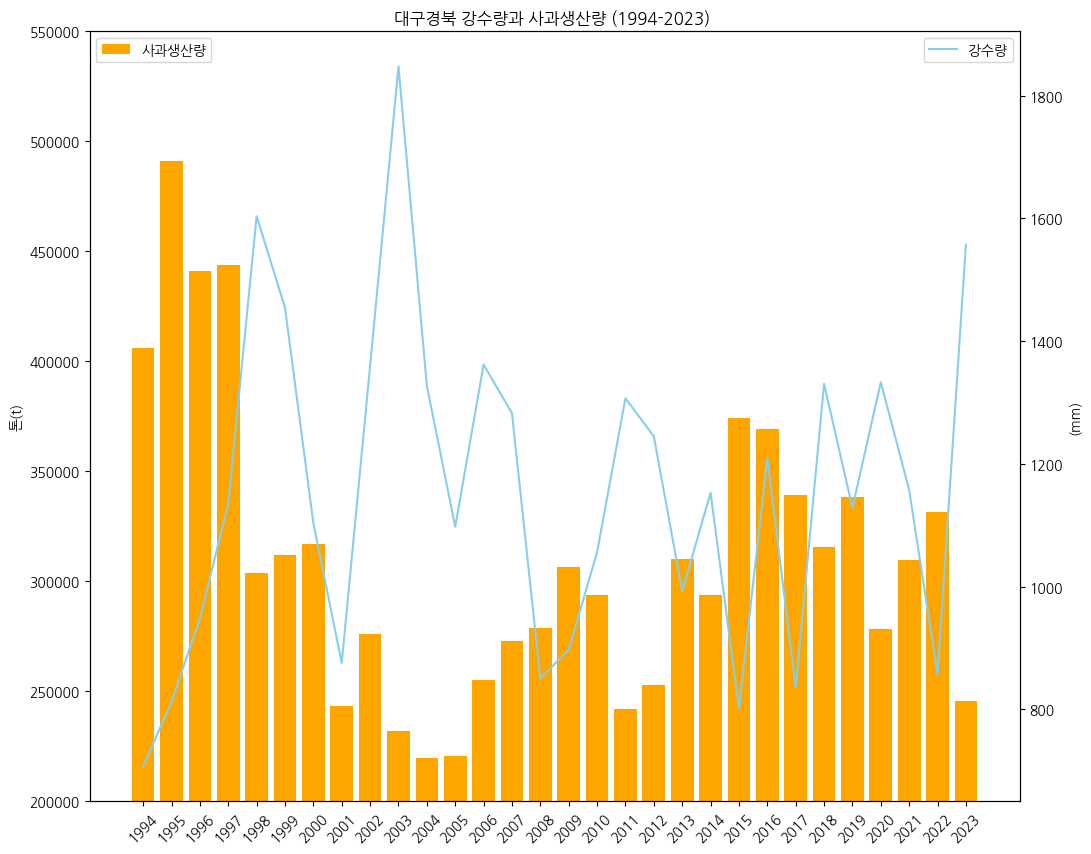

In [235]:
total_rain_plot(event_temp_dict,'01')

In [237]:
apple_Corr=np.corrcoef(rain_df['강수량'],dp1['대구경북'])[0][1]
print(f'매년 강수량과 사과생산량 상관계수 : {apple_Corr}')

매년 강수량과 사과생산량 상관계수 : -0.1173668140708807


In [247]:
tp = pd.read_csv('../DATA/태풍.csv',index_col=0)
tp['합계']

연도
1994    5
1995    3
1996    2
1997    4
1998    2
1999    5
2000    5
2001    1
2002    4
2003    4
2004    5
2005    1
2006    3
2007    3
2008    1
2009    0
2010    3
2011    3
2012    5
2013    3
2014    4
2015    4
2016    2
2017    3
2018    5
2019    7
2020    4
2021    3
2022    5
2023    1
Name: 합계, dtype: int64

In [263]:
def total_typoon_plot(event_temp_dict, month):
    fig, ax1 = plt.subplots(figsize=(12,10))
    ax1.bar(event_temp_dict[month]['날짜'].str.slice(0,4),tp['합계'], label='태풍')
    ax1.legend(loc='upper left')
    ax1.set_ylabel('톤(t)')
    plt.xticks(rotation=45)
    
    
    ax2=ax1.twinx()
    ax2.plot(event_temp_dict[month]['날짜'].str.slice(0,4),dp['대구경북'],marker='o', color='orange',label='사과생산량')
    ax2.legend(loc='upper right')
    ax2.set_ylabel('건')
    ax2.set_ylim(200000,550000)
    plt.title(f'대구경북 태풍발생과 사과생산량 (1994-2023)', fontdict={'fontsize':'xx-large'})
    plt.show()


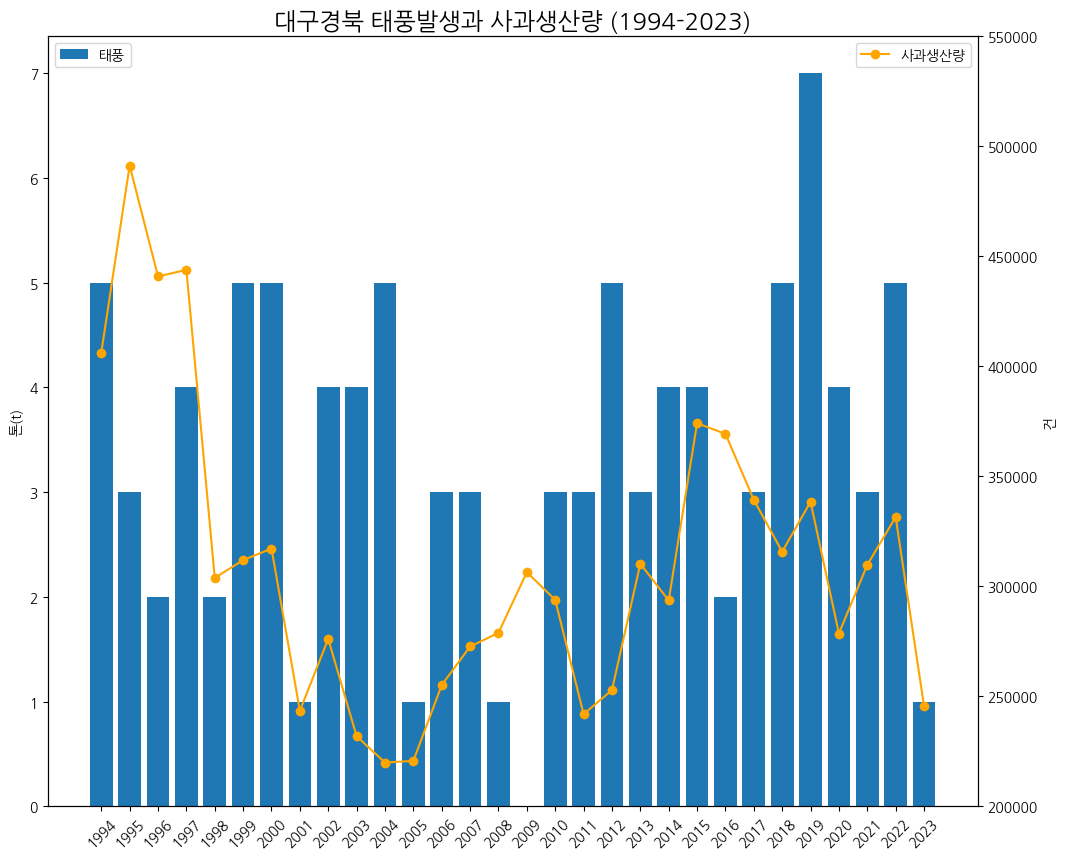

In [264]:
total_typoon_plot(event_temp_dict,'01')

In [267]:
apple_Corr=np.corrcoef(tp['합계'],dp1['대구경북'])[0][1]
print(f'매년 태풍과 사과생산량 상관계수 : {apple_Corr}')

매년 태풍과 사과생산량 상관계수 : 0.01699932046847962


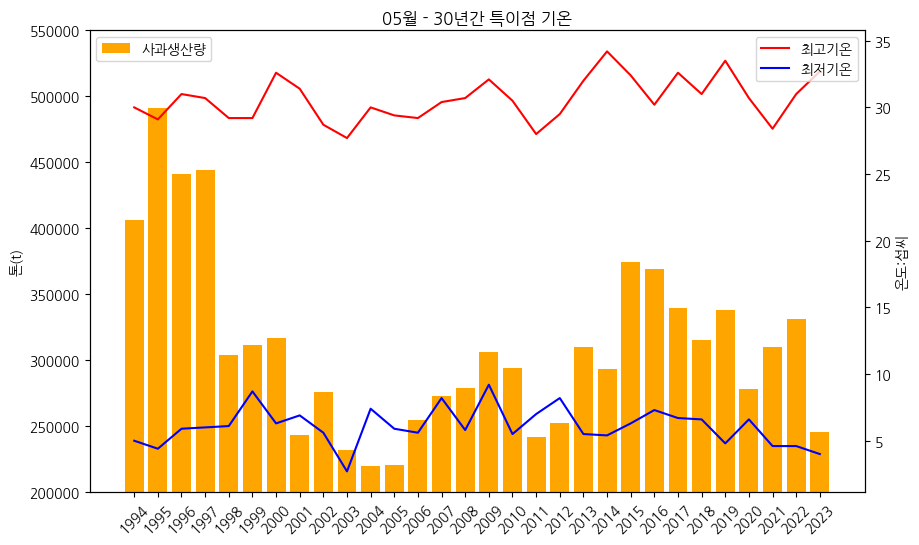

In [265]:
event_temp_plot(event_temp_dict,'05')

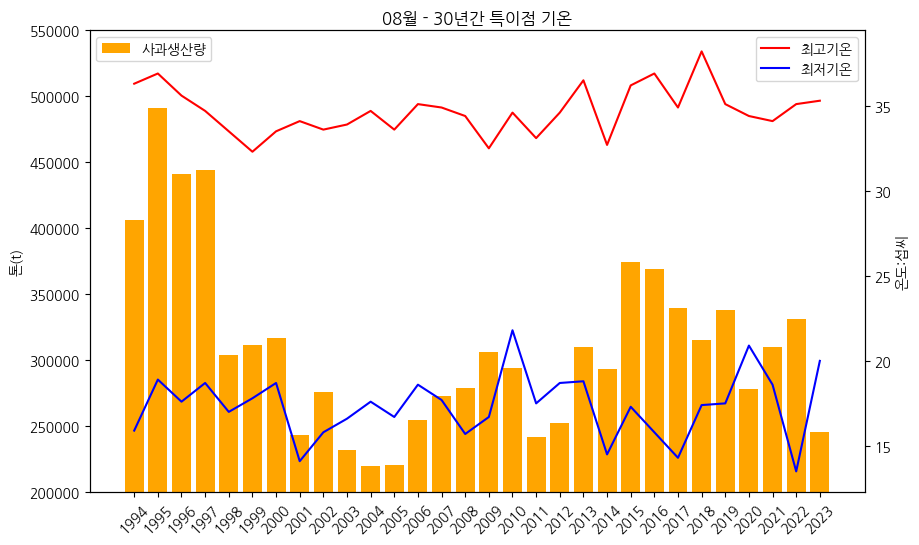

In [266]:
event_temp_plot(event_temp_dict,'08')
